In [1]:
#Locate the csv file
import os
rel_path = "../data/boston.csv"
abs_path = os.path.abspath(rel_path)
abs_path

'D:\\house-price-prediction\\data\\boston.csv'

In [2]:
import pandas as pd

df = pd.read_csv(abs_path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
x = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [7]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

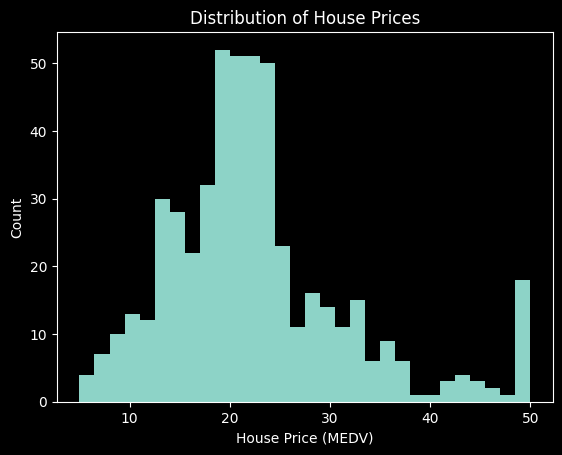

In [8]:
import matplotlib.pyplot as plt

plt.hist(y, bins=30)
plt.xlabel("House Price (MEDV)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

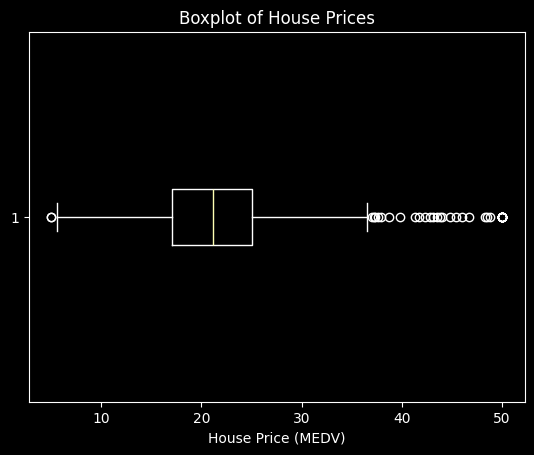

In [9]:
plt.boxplot(y, vert=False)
plt.xlabel("House Price (MEDV)")
plt.title("Boxplot of House Prices")
plt.show()

In [10]:
"""
- Positive correlation → feature increases → price increases
- Negative correlation → feature increases → price decreases
- Near zero → weak linear relationship
"""
corr_with_target = df.corr()["MEDV"].sort_values(ascending=False)
corr_with_target

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

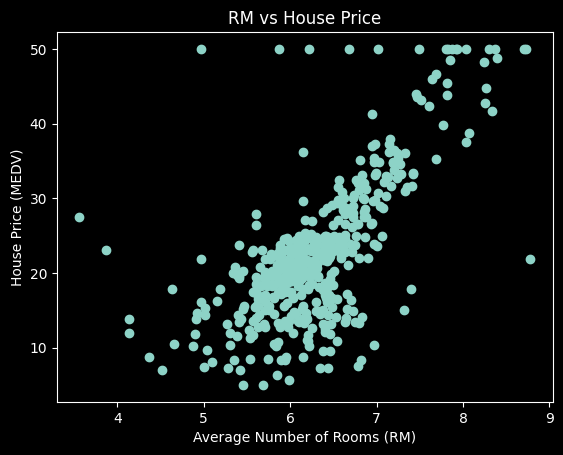

In [11]:
plt.scatter(df["RM"], y)
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("RM vs House Price")
plt.show()

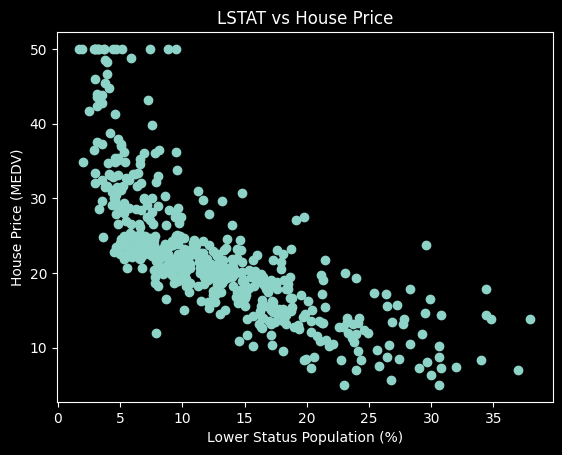

In [12]:
plt.scatter(df["LSTAT"], y)
plt.xlabel("Lower Status Population (%)")
plt.ylabel("House Price (MEDV)")
plt.title("LSTAT vs House Price")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
import numpy as np

# Mean should be ~0, std ~1 for train
print(np.mean(x_train_scaled, axis=0))
print(np.std(x_train_scaled, axis=0))

# Test should be scaled too
print(np.min(x_test_scaled, axis=0))
print(np.max(x_test_scaled, axis=0))

[-2.63815372e-17  0.00000000e+00 -4.17707673e-17  1.31907686e-17
 -5.11142284e-16 -2.61616911e-16 -4.85859977e-16  5.24882668e-17
 -9.45338417e-17 -1.51693839e-16  8.51903806e-16 -4.94653823e-16
 -1.79174607e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-0.4064505  -0.50032012 -1.52845312 -0.27808871 -1.39916607 -3.88794153
 -2.23018134 -1.23983416 -0.97404758 -1.30165846 -2.38924437 -3.82270473
 -1.34862347]
[4.75368398 3.60799957 2.43316256 3.59597476 2.67539377 2.42474449
 1.1245808  3.24257571 1.70689143 1.8495729  1.65398961 0.44418004
 3.45312786]


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
lr_model = LinearRegression()

# Train
lr_model.fit(x_train_scaled, y_train)

# Predict
y_pred = lr_model.predict(x_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 3.19
RMSE: 4.93
R²: 0.67


In [17]:
for feature, coef in zip(x.columns, lr_model.coef_):
    print(f"{feature}: {coef:.2f}")

CRIM: -1.00
ZN: 0.70
INDUS: 0.28
CHAS: 0.72
NOX: -2.02
RM: 3.15
AGE: -0.18
DIS: -3.08
RAD: 2.25
TAX: -1.77
PTRATIO: -2.04
B: 1.13
LSTAT: -3.61


In [18]:
residuals = y_test - y_pred


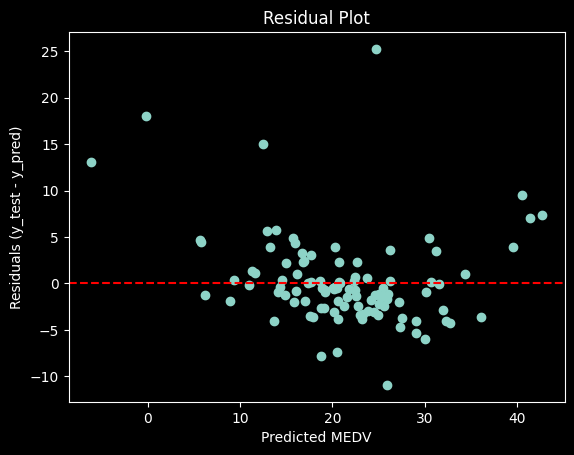

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()

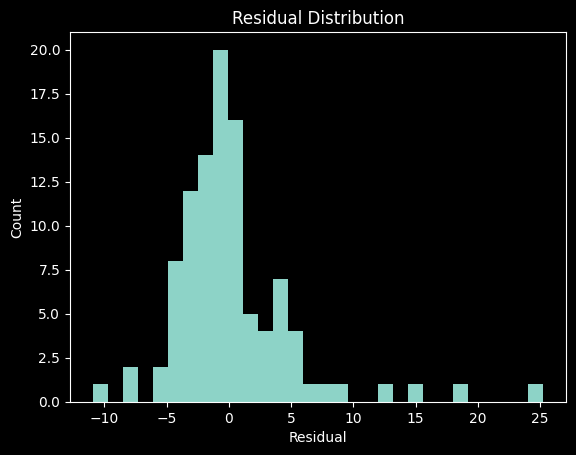

In [20]:
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Distribution")
plt.show()

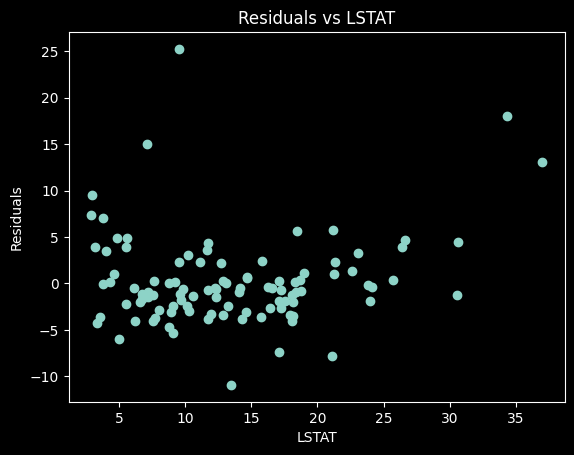

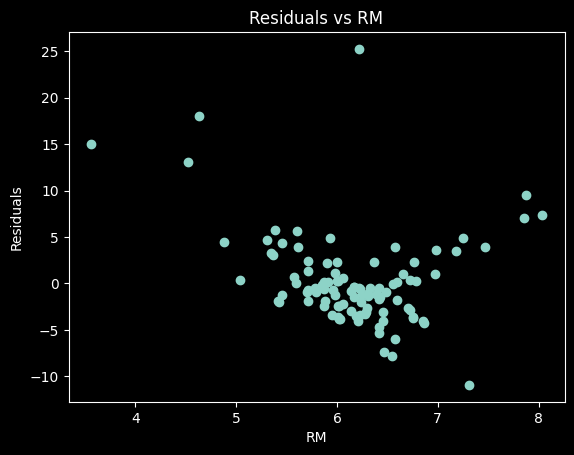

In [21]:
plt.scatter(df.loc[y_test.index, "LSTAT"], residuals)
plt.xlabel("LSTAT")
plt.ylabel("Residuals")
plt.title("Residuals vs LSTAT")
plt.show()

plt.scatter(df.loc[y_test.index, "RM"], residuals)
plt.xlabel("RM")
plt.ylabel("Residuals")
plt.title("Residuals vs RM")
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=8,        # control overfitting
    random_state=42
)

rf_model.fit(x_train_scaled, y_train)  # No scaling needed for trees

# Predict
y_pred_rf = rf_model.predict(x_test_scaled)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")

Random Forest - MAE: 2.06
Random Forest - RMSE: 2.92
Random Forest - R²: 0.88


In [23]:
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False)

RM         0.497262
LSTAT      0.326909
DIS        0.055424
CRIM       0.037210
NOX        0.015492
PTRATIO    0.015264
TAX        0.015024
AGE        0.013332
B          0.010833
INDUS      0.006297
RAD        0.004366
ZN         0.001608
CHAS       0.000979
dtype: float64

In [24]:
import joblib

joblib.dump(rf_model, "../models/house_price_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']